In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx
from Functions import get_distance_matrix

In [3]:
# Load the data
Uncleaned_Data = pd.read_csv("DATA/Stock_Data/stock_log_returns_2Y.csv", index_col='Date')

#Cleaning
log_returns = Uncleaned_Data.dropna(axis=1)
log_returns


,AACG,AADI,AAL,AAME,AAOI,AAON,AAPL,AAWW,ABCB,ABEO,...,ZIVO,ZKIN,ZLAB,ZM,ZS,ZTEK,ZUMZ,ZYME,ZYNE,ZYXI
Date,,,,,,,,,,,,,,,,,,,,,
01/10/2019,-0.076470,-0.005900,-0.006323,-0.055673,-0.092373,-0.003489,0.002764,-0.067211,-0.008736,0.008811,...,0.251314,-0.067252,0.007698,-0.005131,-0.005091,0.000000,-0.007923,0.011626,-0.026811,0.022870
02/10/2019,0.057894,-0.045394,-0.054835,-0.038915,0.001953,-0.047873,-0.025387,-0.027069,-0.015410,-0.026668,...,0.000000,0.000000,-0.045819,-0.026194,-0.001703,-0.033902,-0.009912,-0.010014,-0.014369,0.102479
03/10/2019,0.018576,0.010778,-0.003949,0.000000,-0.002931,0.009124,0.008459,-0.015361,0.001526,0.017858,...,-0.117783,-0.039917,0.028804,0.039559,0.042338,0.000000,0.002888,0.004819,0.080096,0.090407
04/10/2019,0.030214,-0.004605,0.021919,-0.003976,0.025599,0.027988,0.027646,0.014708,0.007849,-0.004435,...,0.117783,0.065669,0.015787,-0.003912,0.004889,0.000000,-0.001282,0.024927,-0.020566,0.058429
07/10/2019,0.046520,-0.015504,0.000000,-0.003992,-0.001432,-0.007535,0.000220,-0.046157,0.001512,0.056170,...,0.000000,0.000000,-0.021106,0.005993,0.013523,0.000000,-0.020746,0.033810,0.002594,-0.006415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24/09/2021,0.016807,-0.014644,0.023174,0.017744,0.011111,-0.017784,0.000613,0.012047,0.022356,-0.033336,...,0.457241,-0.049433,-0.008391,-0.013964,-0.000107,-0.026223,-0.012494,-0.042560,-0.015573,-0.031278
27/09/2021,-0.012579,-0.057823,0.003733,0.005013,0.000000,0.006260,-0.010606,0.048123,0.046098,0.000000,...,-0.230048,0.006734,-0.061240,0.001907,-0.026272,0.087816,0.052972,0.037507,0.026550,0.000000
28/09/2021,0.041328,-0.018121,-0.001865,-0.010050,-0.026594,-0.016933,-0.024089,0.014224,-0.013665,-0.034486,...,0.096779,-0.098672,-0.071124,-0.041108,-0.052659,-0.002215,-0.006903,0.003035,-0.022076,-0.014316


# Network Production

In [ ]:
Extra_Stats = []



#Timeframe
window_size = 21

#Increment
increment_size = 1

#Number of rows
num_rows = log_returns.shape[0]


for n in range(0, (num_rows)//increment_size):  
    # Get the current time slice of the data

    #Two Pointers
    Lp = n*increment_size
    Rp = (n)*increment_size + window_size

    #SLice of Log Returns
    Time_Slice = log_returns.iloc[Lp : Rp , :]

    #Remove columns with all zeros
    Time_Slice_No_0 = Time_Slice.loc[:, Time_Slice.sum(axis = 0) != 0]

    #Date at right pointer
    Date = log_returns.index[Rp]

    #remove slashes so the file can be saved
    Date = Date.replace("/", "-")

    #Count the number of stocks dropped
    num_stocks_droped = Time_Slice.shape[1] - Time_Slice_No_0.shape[1]
    

    #Get Matrix

    #Correlation matrix of timeslice
    corr_matrix = Time_Slice_No_0.corr(method="pearson", min_periods=1)

    # Calculate the distance matrix for the current time slice
    distance_matrix = get_distance_matrix(corr_matrix)

    #Debug
    #distance_matrix.to_csv(f"DATA/debug/distance_matrix_{Date}.csv")



    #Generate networks

    #Get complete network
    G = nx.from_pandas_adjacency(distance_matrix)

    #Generate MST
    # Run Kruskal's algorithm to find the minimum spanning tree
    mst = nx.minimum_spanning_tree(G)

    # Convert the minimum spanning tree to a weighted adjacency matrix
    mst_matrix = nx.to_numpy_array(mst)

   

    #Threshold network

    mst_weights = mst_matrix[mst_matrix > 0]  # Filter out zeros
    weights_df = pd.DataFrame(mst_weights)

    #100% mst edges
    Max_Mst_Weight = max(mst_weights)
    Threshold_100_MST = Max_Mst_Weight

    #99% mst edges
    #Gets the 99% percentile of the MST distribution
    # Threshold_99_MST = np.quantile(mst_weights[mst_weights != 0], 0.99)


    #Set suitable threshold
    Optimal_Threshold = Threshold_100_MST 

    # Replace all values above the threshold with 0
    threshold_matrix_df = distance_matrix.applymap(lambda x: 0 if x > Optimal_Threshold else x)

    threshold_matrix_df.to_csv(f"DATA/Networks/1_Monthly_MAX_MST_Threshold_Networks/Monthly_MAX_MST_{Date}_{n}.csv")



    #Save some extra stats
    Extra_Stats.append({
        "Increment" : Date,
        "Optimal_Threshold_99_MST" : Optimal_Threshold,
        "Max_Mst_Weight": Threshold_100_MST,
        "Num_Stocks_Dropped": num_stocks_droped
        })




    #Outputs
    
    Code_Progress = (n/((log_returns.shape[0])//increment_size)) * 100
    print(f"{Code_Progress} %")
    # print(num_stocks_droped)
    # #print(Time_Slice_No_0)
    print(Lp, Rp, Date)



    #Break when RP reaches the end of the data
    if Rp == num_rows - 1:# or  n == 3:
        break




#Save extra stats to csv
pd.DataFrame(Extra_Stats).to_csv("DATA/Networks/Network_Creation_Extra_Stats/Network_Creation_Extra_Stats.csv",index=False)


   



C:\Users\chris\AppData\Local\Temp\ipykernel_9796\216942022.py:83: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  threshold_matrix_df = distance_matrix.applymap(lambda x: 0 if x > Optimal_Threshold else x)


0.0 %
0 21 30-10-2019


KeyboardInterrupt: 

# Confirming Suitibale thresholds

max length
0.9741861027425883


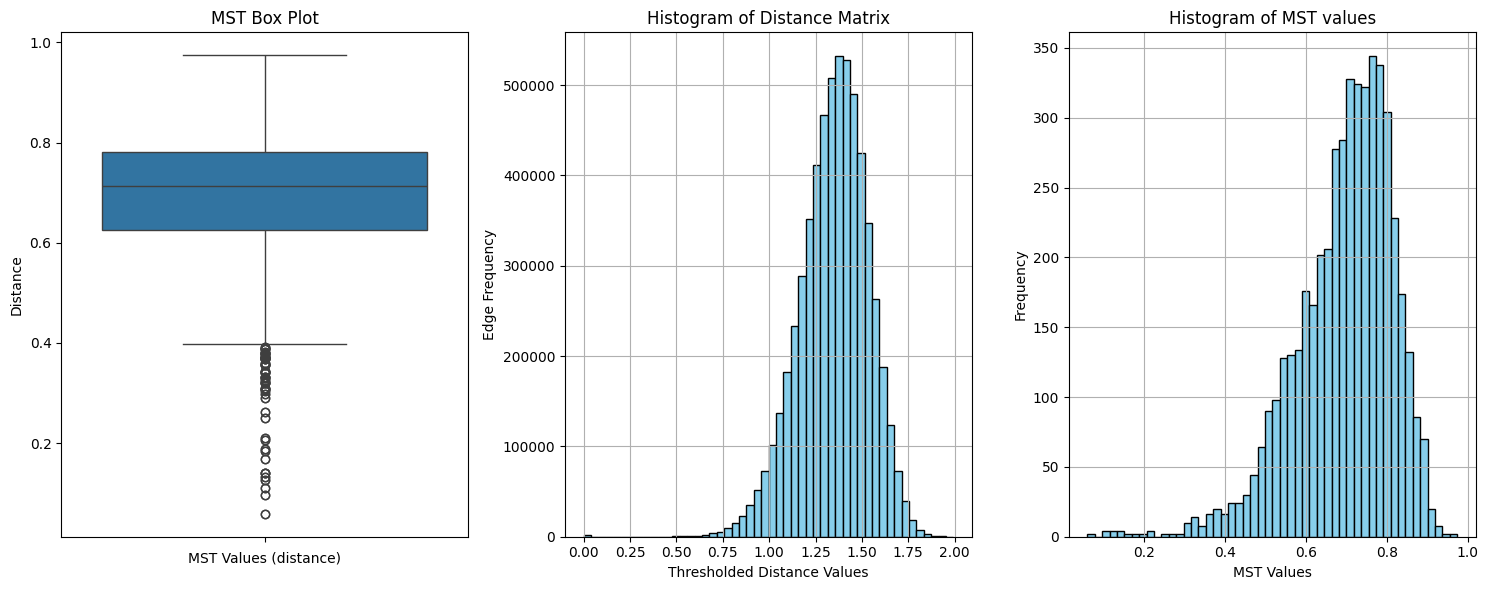

In [ ]:
#Timeframe for 5 year

mst_weights = mst_matrix[mst_matrix > 0]  # Filter out zeros
weights_df = pd.DataFrame(mst_weights)

Max_Mst_Weight = max(mst_weights)
print('max length')
print(Max_Mst_Weight)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))  # Adjust size as needed

# Plot the box plot on the first subplot

#MST Box Plot
sns.boxplot(data=mst_weights, orient='v', ax=axes[0])
axes[0].set_ylabel('Distance')
axes[0].set_title('MST Box Plot')
axes[0].set_xlabel('MST Values (distance)')


# Plot the histogram on the second subplot

#Histogram of Distance Matrix
axes[1].hist(distance_matrix.values.flatten(), bins=50, color='skyblue', edgecolor='black')  # Adjust number of bins as needed
axes[1].set_xlabel('Thresholded Distance Values')
axes[1].set_ylabel('Edge Frequency')
axes[1].set_title('Histogram of Distance Matrix')
axes[1].grid(True)

#Histogram of MST values
axes[2].hist(mst_weights, bins=50, color='skyblue', edgecolor='black')  # Adjust number of bins as needed
axes[2].set_xlabel('MST Values')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Histogram of MST values')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()





# Ensuring Suitable threshold

Creating criteria stats

In [15]:
#Get a specific distance matrix for thresholding analysis

#SLice of Log Returnslog_returns from 11/12/2019 to 10/01/2020

Lp = 50
Rp = 71
Time_Slice = log_returns.iloc[Lp:Rp , :]

#Remove columns with all zeros
Time_Slice_No_0 = Time_Slice.loc[:, Time_Slice.sum(axis = 0) != 0]

#Date at right pointer
Date = log_returns.index[Rp]

#remove slashes so the file can be saved
Date = Date.replace("/", "-")

corr_matrix = Time_Slice_No_0.corr(method="pearson", min_periods=1)
distance_matrix = get_distance_matrix(corr_matrix)

G = nx.from_pandas_adjacency(distance_matrix)

original_complete_graph_num_edges = G.number_of_edges()

distance_thresholds_range = [i/100 for i in range(0, 200, 5)]

threshold_stats_tracker = []

for threshold in distance_thresholds_range:
    df = distance_matrix.copy()
    df[df > threshold] = 0
    G_criteria = nx.from_pandas_adjacency(df)

    try:
        cluster_assignments = nx.community.louvain_communities(G_criteria, resolution=1, seed=42)            #resolution changing #function changing
        modularity = nx.community.quality.modularity(G_criteria, cluster_assignments)
    except ZeroDivisionError:
        cluster_assignments = []
        modularity = np.nan

    threshold_stats_tracker.append({
        "threshold": threshold,
        "modularity": modularity,
        "percent_edges": ( G_criteria.number_of_edges() / original_complete_graph_num_edges ) * 100,
        "num_of_connected_components": nx.number_connected_components(G_criteria),
        "num_of_clusters": len(cluster_assignments)
    })
    print(threshold, end=", ")

print("Complete applying threshold")

Criteria_Graph_Stats_df = pd.DataFrame(threshold_stats_tracker)

Criteria_Graph_Stats_df.to_csv(f"DATA/debug/Criteria_Graph_Stats.csv", index=False)

0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5, 1.55, 1.6, 1.65, 1.7, 1.75, 1.8, 1.85, 1.9, 1.95, Complete applying threshold


In [ ]:
Criteria_Graph_Stats_df.to_csv(f"DATA/debug/Criteria_Graph_Stats.csv", index=False)

Criteria Graphs

In [9]:
Criteria_Graph_Stats_df = pd.read_csv(f"DATA/debug/Criteria_Graph_Stats.csv", index_col=0)

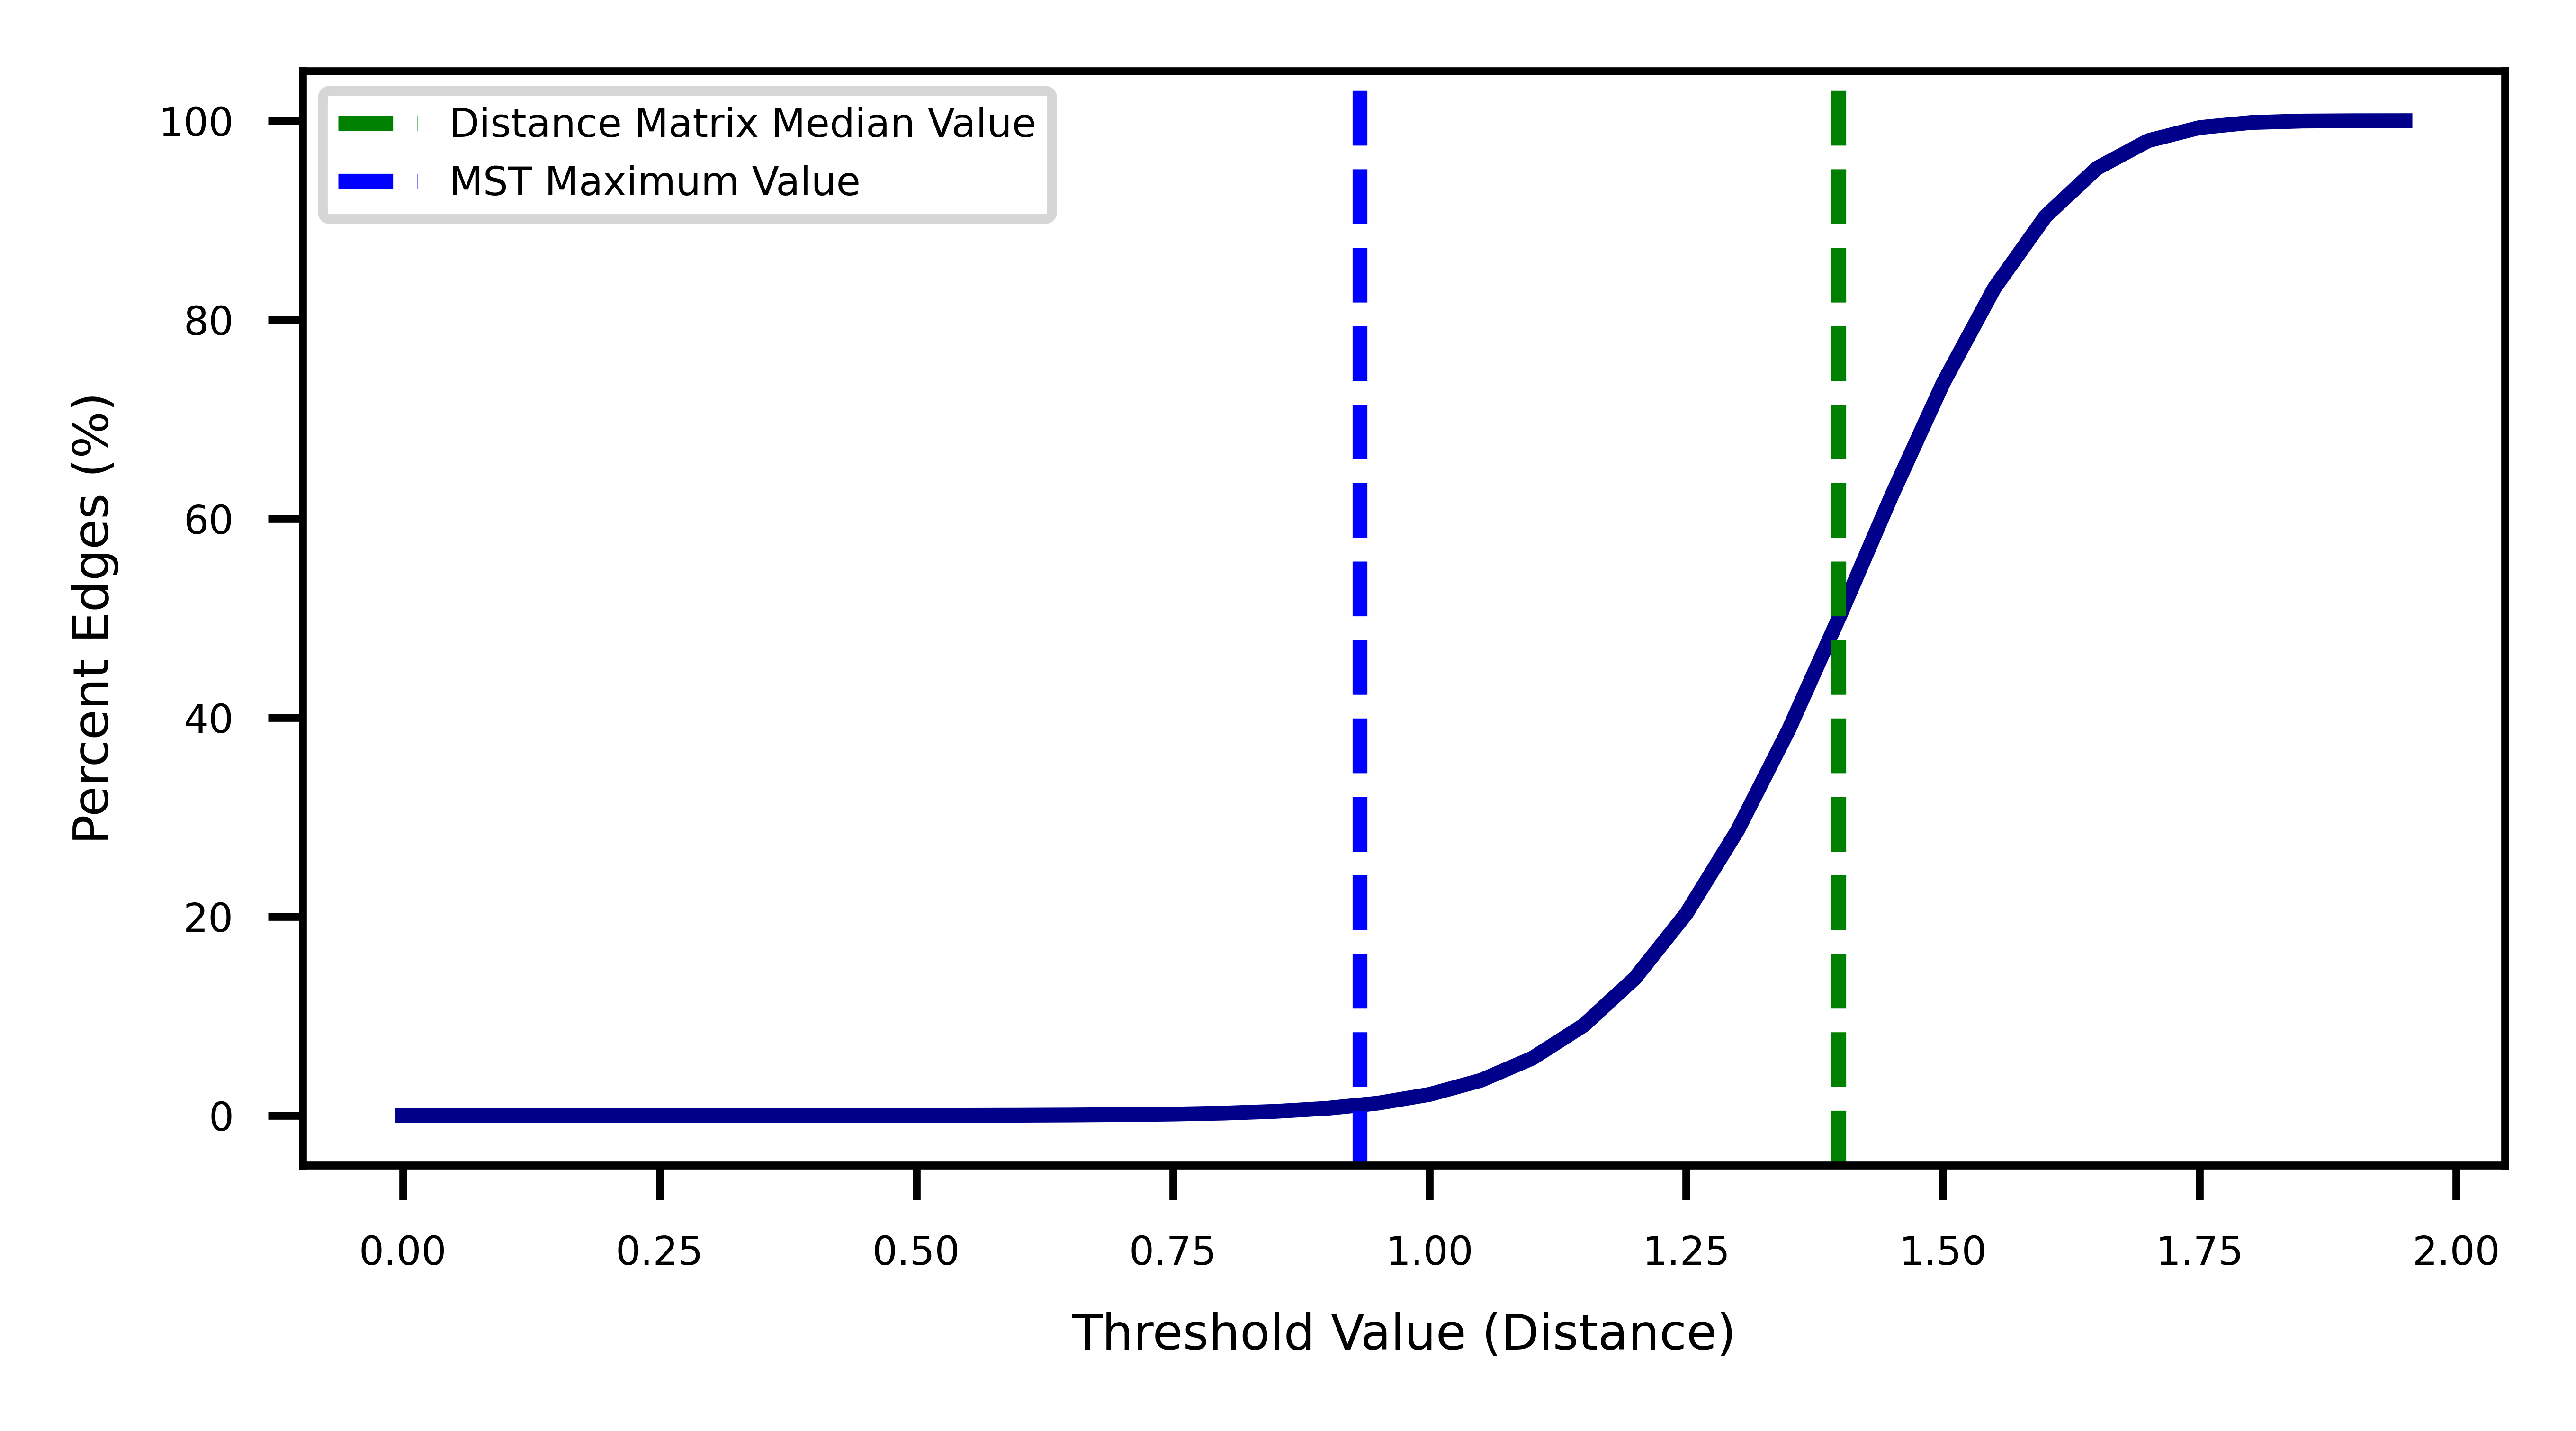

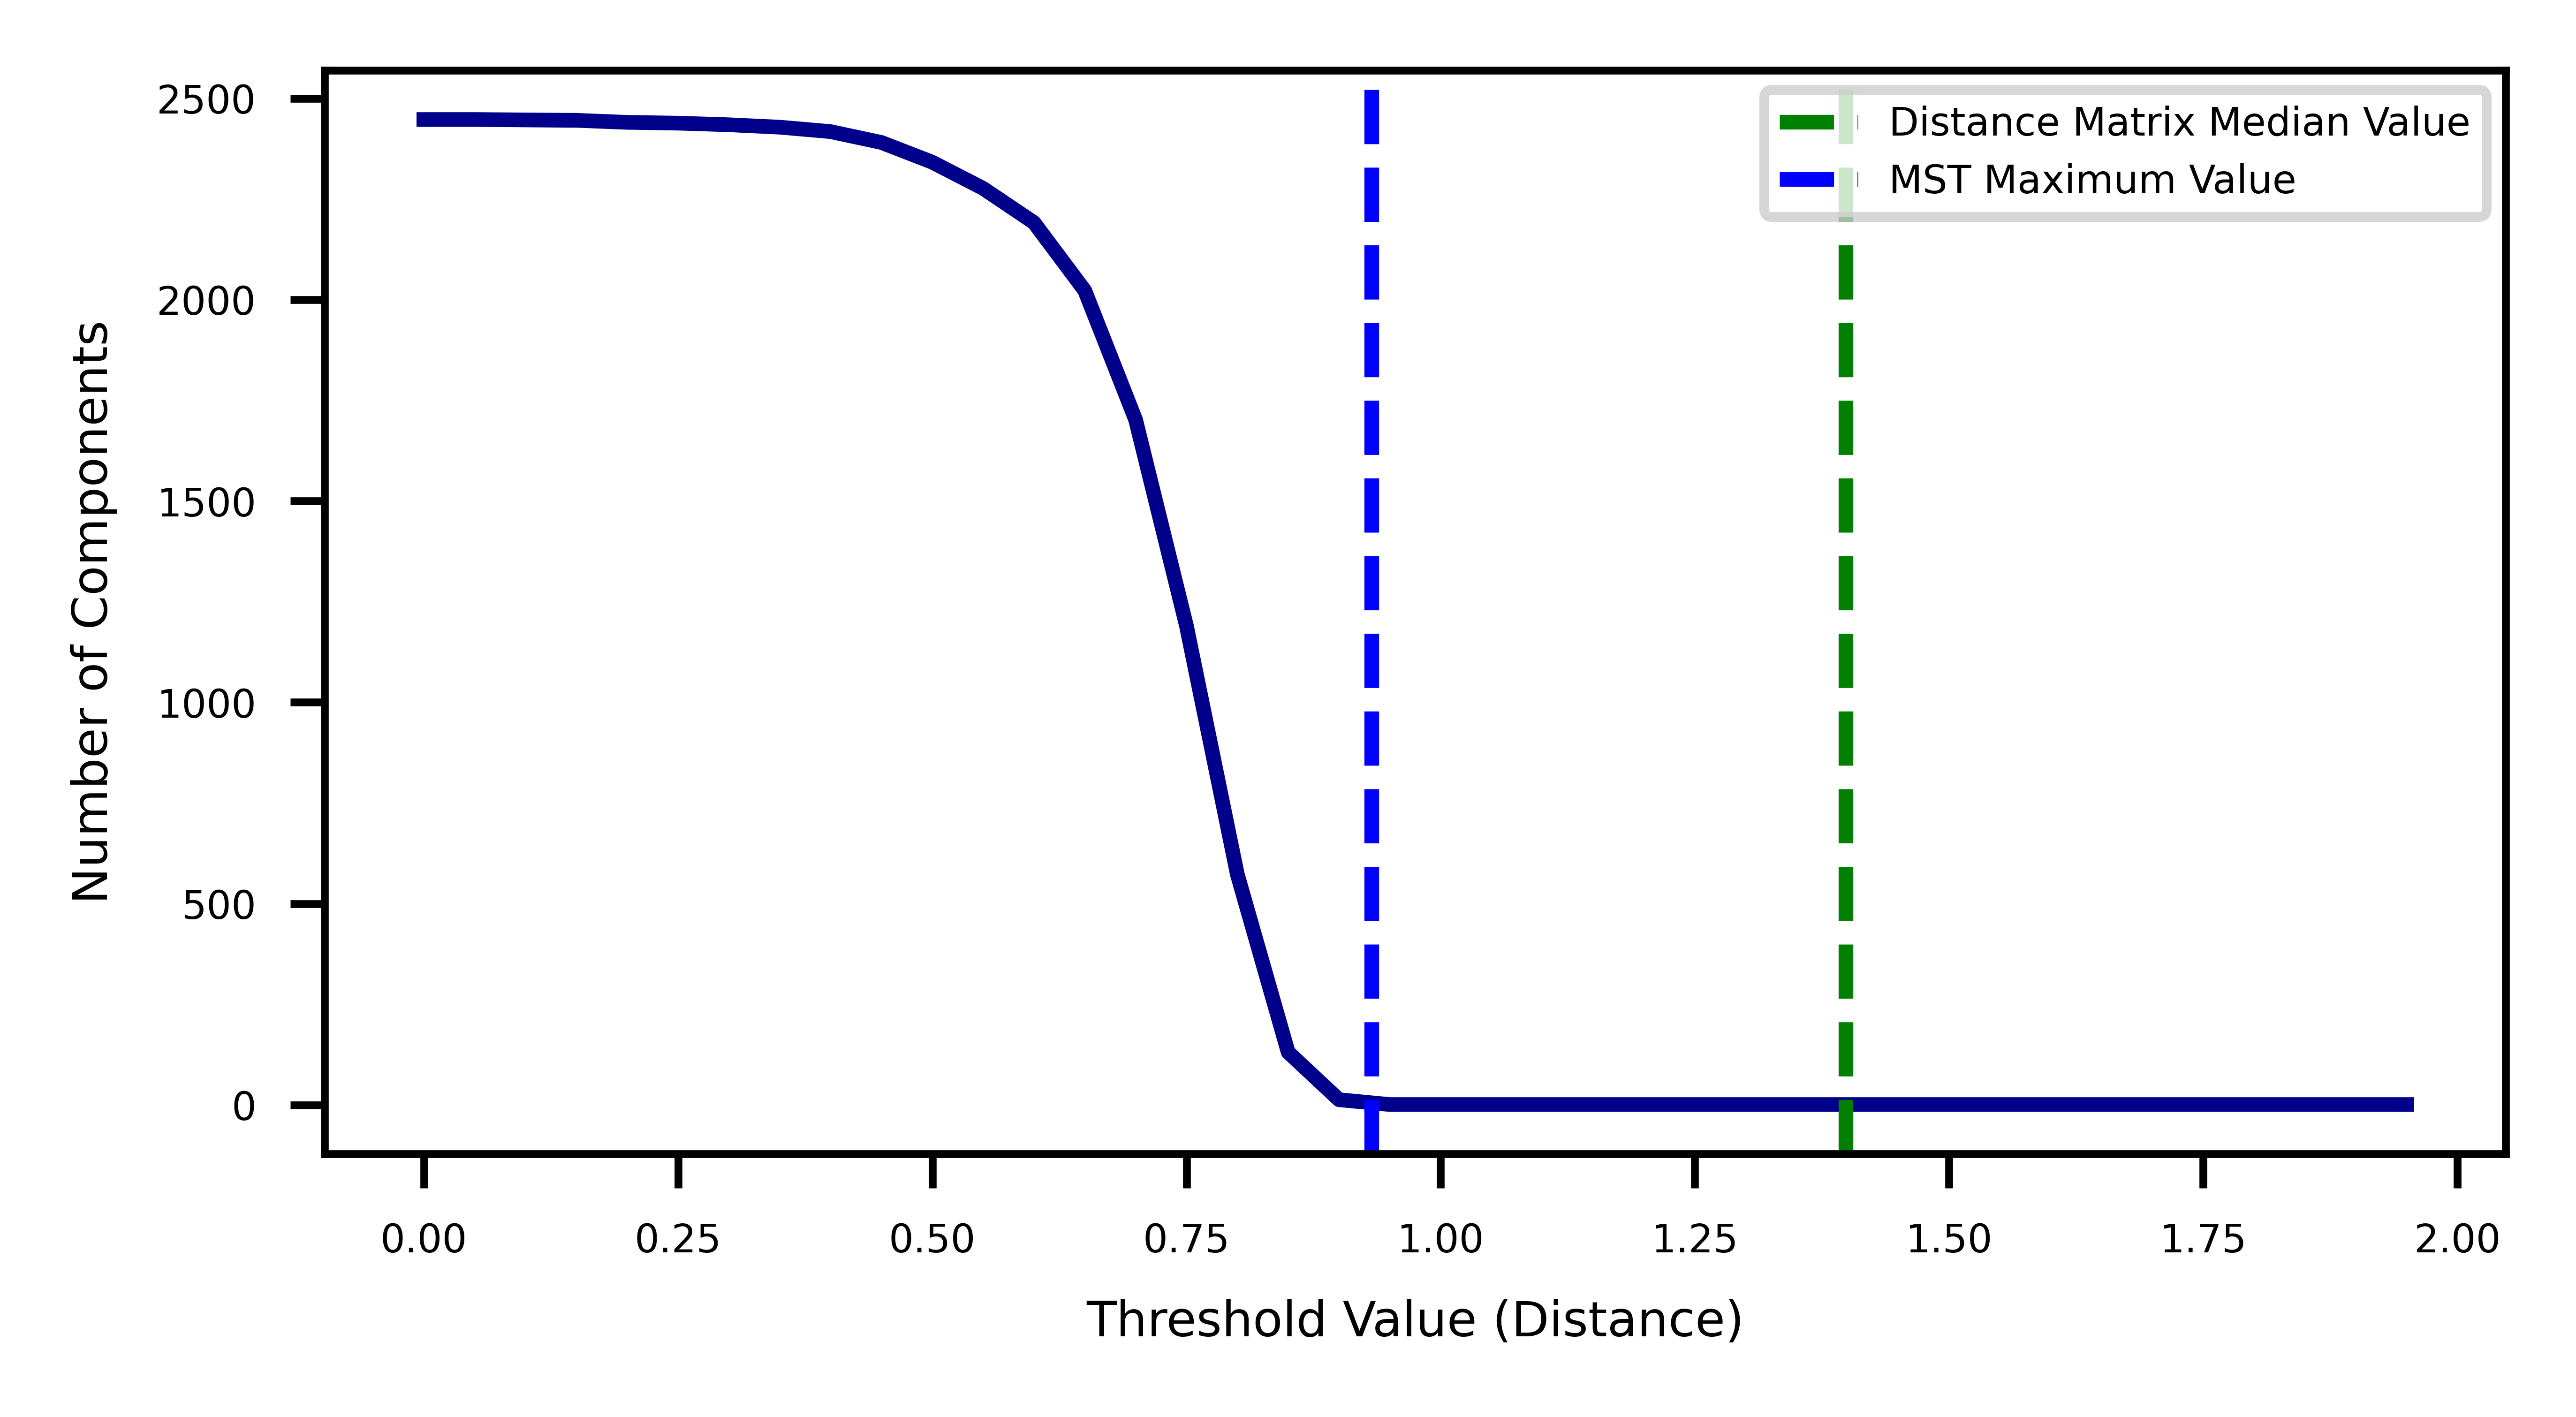

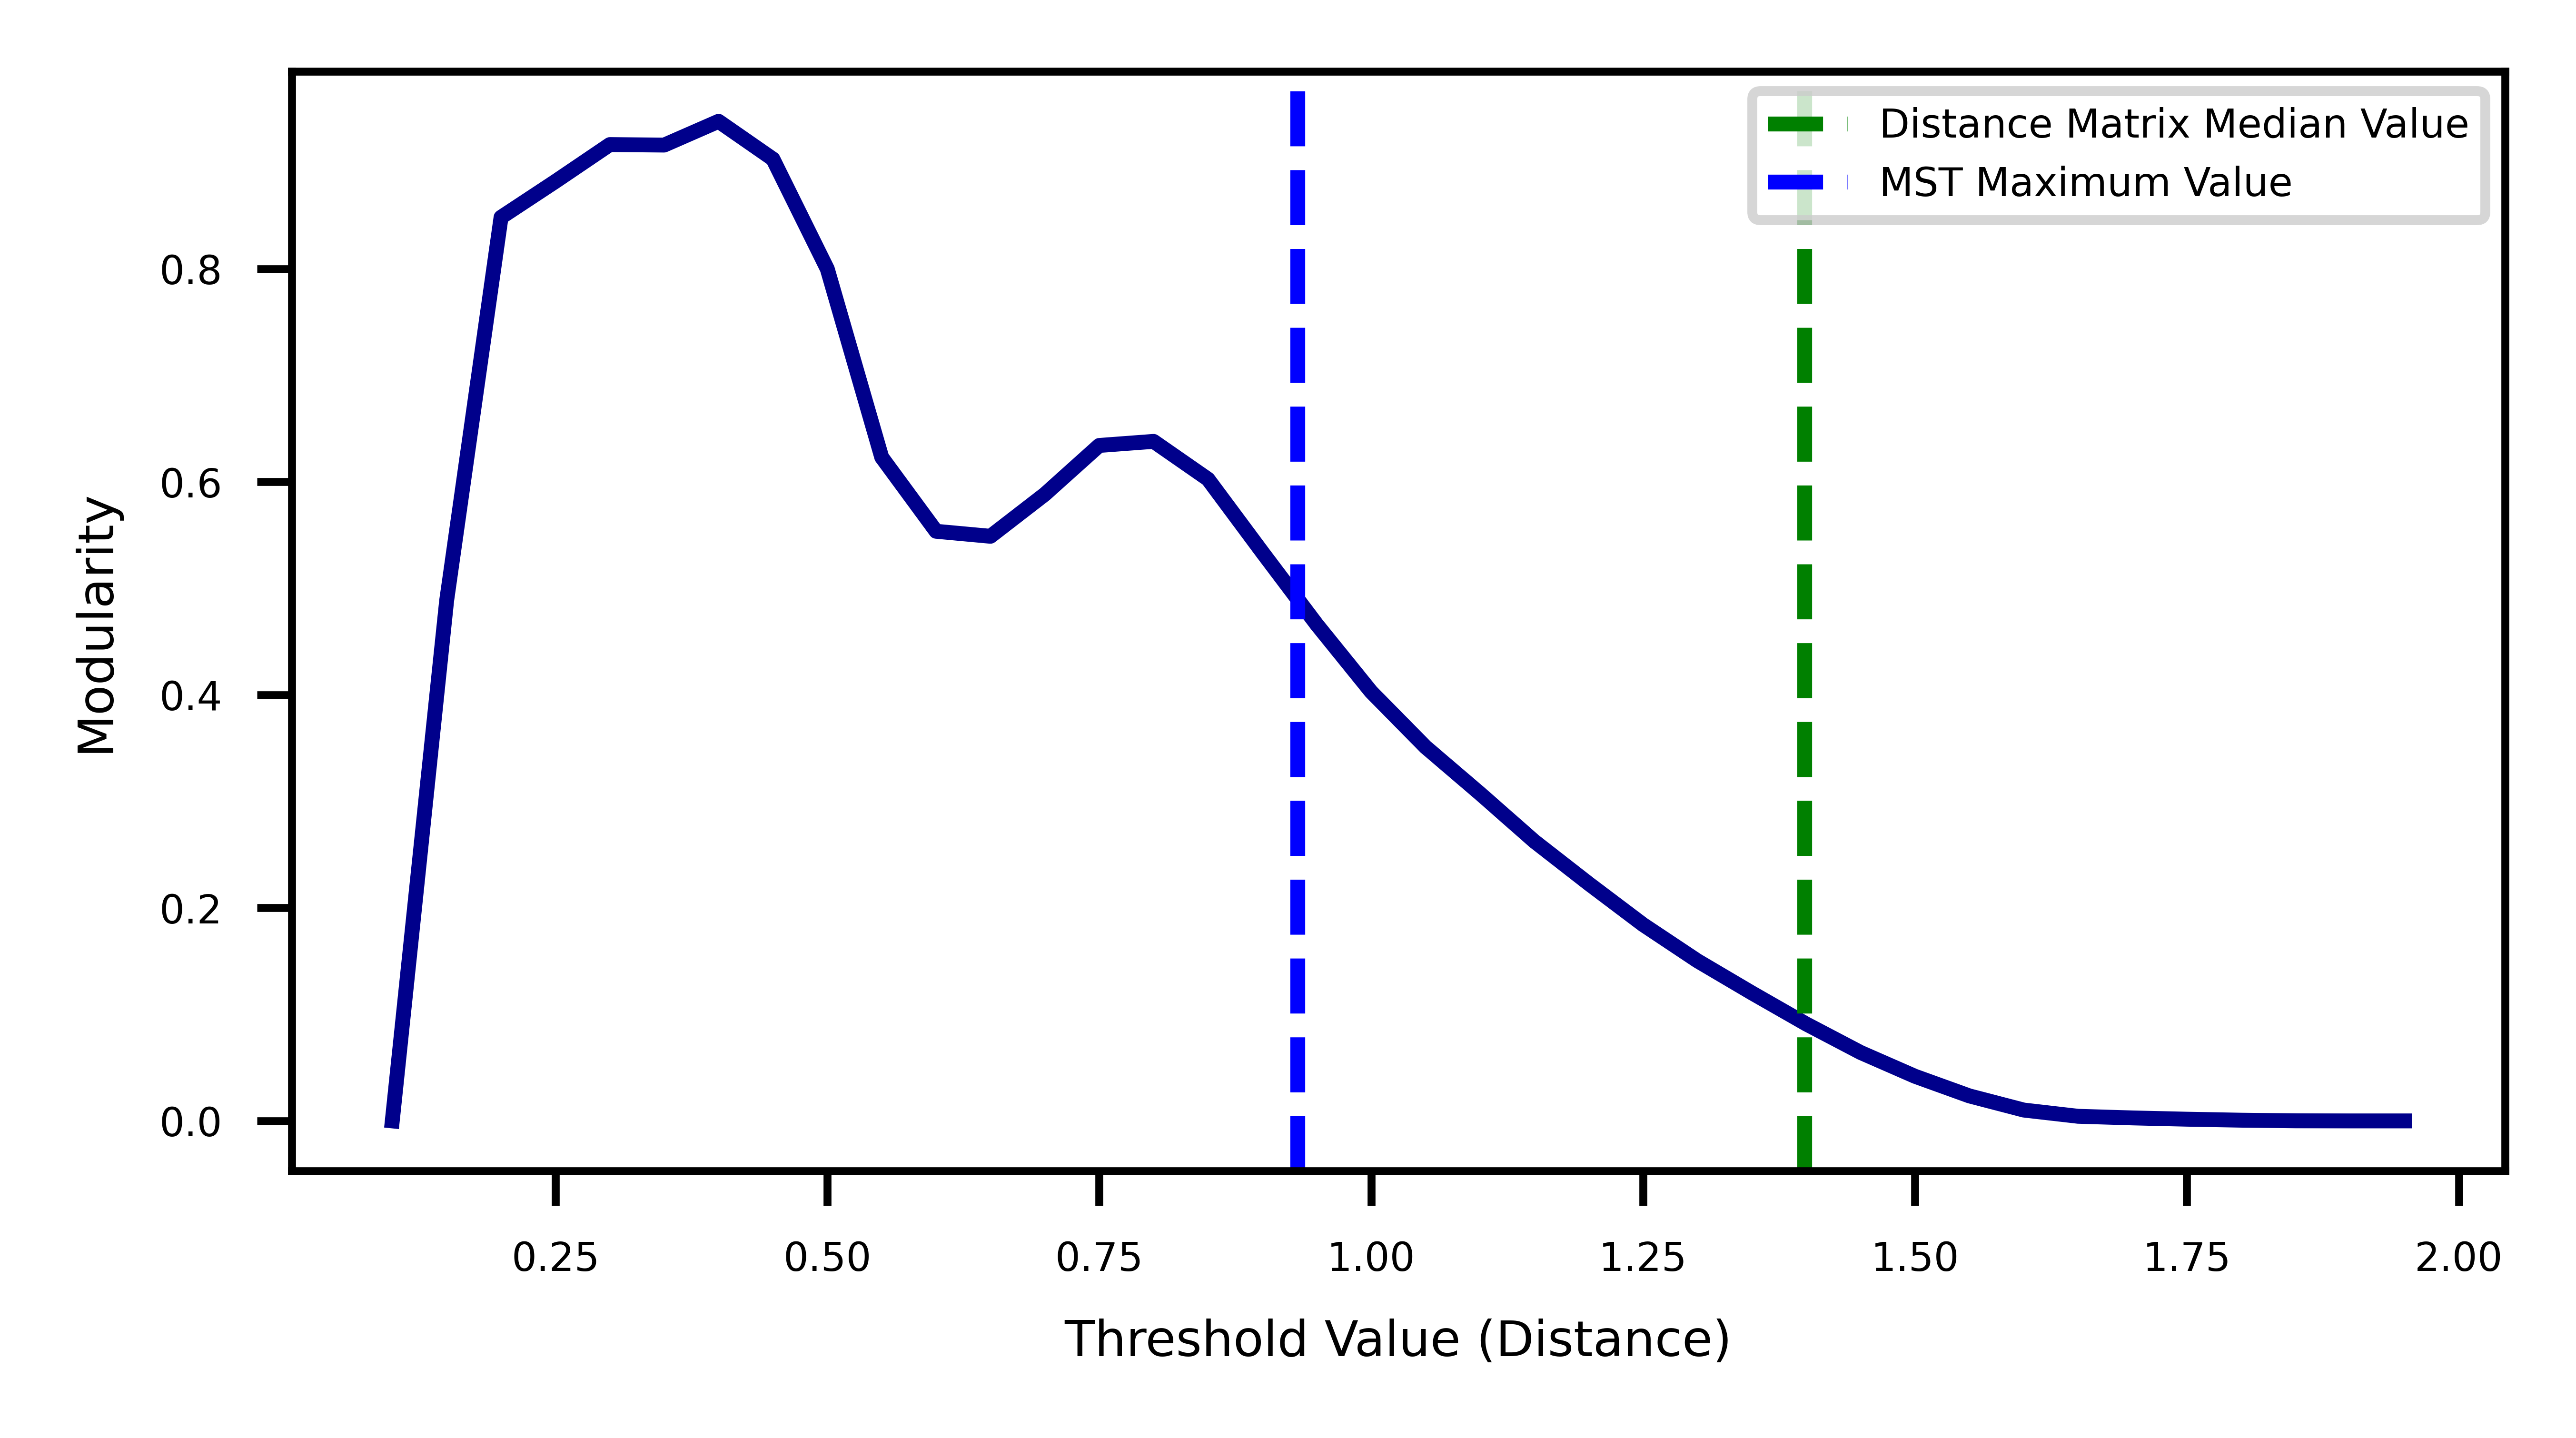

In [ ]:
Lp = 50
Rp = 71
Time_Slice = log_returns.iloc[Lp:Rp , :]

#Remove columns with all zeros
Time_Slice_No_0 = Time_Slice.loc[:, Time_Slice.sum(axis = 0) != 0]

#Date at right pointer
Date = log_returns.index[Rp]

#remove slashes so the file can be saved
Date = Date.replace("/", "-")

corr_matrix = Time_Slice_No_0.corr(method="pearson", min_periods=1)
distance_matrix = get_distance_matrix(corr_matrix)

G = nx.from_pandas_adjacency(distance_matrix)
mst = nx.minimum_spanning_tree(G)
mst_matrix = nx.to_numpy_array(mst)
mst_weights = mst_matrix[mst_matrix > 0]  # Filter out zeros
weights_df = pd.DataFrame(mst_weights)

Max_Mst_Weight = max(mst_weights)

Optimal_Threshold = Max_Mst_Weight 


Median_Complete_Dist_Mat = np.median(distance_matrix.values.flatten())


# Percent edges

plt.rcParams['font.size'] = 4      
LABEL_FONT_SIZE = 5

plt.figure(figsize=(4,2), dpi=1500)    #figsize=(x width, height)
sns.lineplot(Criteria_Graph_Stats_df, x="threshold", y="percent_edges", color='#00008b')
#plt.axvline(x = Optimal_Threshold, color='red', linestyle='--', label="Optimal Threshold") 
plt.axvline(x = Median_Complete_Dist_Mat, color='green', linestyle='--', label="Distance Matrix Median Value")
plt.axvline(x = Max_Mst_Weight, color='blue', linestyle='--', label= "MST Maximum Value") 
plt.xlabel('Threshold Value (Distance)', fontsize= LABEL_FONT_SIZE)
plt.ylabel('Percent Edges (%)', fontsize= LABEL_FONT_SIZE)
plt.legend() 
plt.savefig("./DATA/Figures/Criteria_Graphs/Max_MST/PERCENT_EDGES_Criteria_Graph.pdf", dpi=1500)
plt.show()


### num_of_connected_components

plt.figure(figsize=(4, 2), dpi=1500)    #figsize=(x width, height)
sns.lineplot(Criteria_Graph_Stats_df, x="threshold", y="num_of_connected_components", color='#00008b')
#plt.axvline(x= Optimal_Threshold, color='red', linestyle='--', label="Optimal Threshold")
plt.axvline(x = Median_Complete_Dist_Mat, color='green', linestyle='--', label="Distance Matrix Median Value")
plt.axvline(x = Max_Mst_Weight, color='blue', linestyle='--', label= "MST Maximum Value") 
plt.xlabel('Threshold Value (Distance)', fontsize= LABEL_FONT_SIZE)
plt.ylabel('Number of Components', fontsize= LABEL_FONT_SIZE)
plt.legend(loc='upper right') #plots the legend
plt.savefig("./DATA/Figures/Criteria_Graphs/Max_MST/NUM_OF_CONNECTED_COMPONENTS_Criteria_Graph.pdf", dpi=1500)
plt.show()


### MODULARITY
plt.figure(figsize=(4,2), dpi=1500)    #figsize=(x width, height)
sns.lineplot(Criteria_Graph_Stats_df, x="threshold", y="modularity", color='#00008b')
#plt.axvline(x= Optimal_Threshold, color='red', linestyle='--', label="Optimal Threshold")
plt.axvline(x = Median_Complete_Dist_Mat, color='green', linestyle='--', label="Distance Matrix Median Value")
plt.axvline(x = Max_Mst_Weight, color='blue', linestyle='--', label= "MST Maximum Value") 
plt.xlabel('Threshold Value (Distance)', fontsize= LABEL_FONT_SIZE)
plt.ylabel('Modularity', fontsize= LABEL_FONT_SIZE)
plt.legend() 
plt.savefig("./DATA/Figures/Criteria_Graphs/Max_MST/MODULARITY_Criteria_Graph.pdf", dpi=1500)
plt.show()


